# EDA- Firearm Background Checks & Firearm Mortality Rate in 2017

The objective of this EDA are:  
    1) Determine which states give out the most firearm permit  
    2) Investigate the number of permits licsened correlates with the firarm death mortality rate.  
    3) Find high school graduation rate it associated with permits and death mortality rate

In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)

In [128]:
guns = pd.read_csv("nics-firearm-background-checks.csv")
mortality = pd.read_csv("Firearm Mortality by State.csv")
highschool = pd.read_csv("graduationbystate.csv")

In [3]:
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 27 columns):
month                        13860 non-null object
state                        13860 non-null object
permit                       13836 non-null float64
permit_recheck               2475 non-null float64
handgun                      13840 non-null float64
long_gun                     13841 non-null float64
other                        6875 non-null float64
multiple                     13860 non-null int64
admin                        13837 non-null float64
prepawn_handgun              11917 non-null float64
prepawn_long_gun             11915 non-null float64
prepawn_other                6490 non-null float64
redemption_handgun           11920 non-null float64
redemption_long_gun          11919 non-null float64
redemption_other             6490 non-null float64
returned_handgun             3575 non-null float64
returned_long_gun            3520 non-null float64
returned_other   

In [4]:
guns.isnull().sum().head()

month                 0
state                 0
permit               24
permit_recheck    11385
handgun              20
dtype: int64

In [5]:
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-10,Alabama,25615.0,635.0,16759.0,13692.0,1078.0,938,0.0,31.0,...,0.0,0.0,0.0,34.0,24.0,6.0,0.0,1.0,0.0,63254
1,2019-10,Alaska,168.0,5.0,3304.0,3510.0,392.0,302,0.0,0.0,...,0.0,0.0,0.0,23.0,9.0,0.0,1.0,0.0,0.0,8281
2,2019-10,Arizona,5151.0,686.0,11543.0,7509.0,1138.0,798,0.0,12.0,...,0.0,0.0,0.0,21.0,13.0,3.0,0.0,0.0,0.0,28833
3,2019-10,Arkansas,3031.0,825.0,4809.0,7173.0,351.0,391,3.0,12.0,...,0.0,0.0,0.0,13.0,11.0,2.0,0.0,1.0,0.0,19303
4,2019-10,California,36057.0,0.0,32128.0,23005.0,4198.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96252


In [6]:
date = pd.to_datetime(guns.month)

In [7]:
guns['year'] = date.dt.year

In [8]:
guns['months'] = date.dt.month

In [9]:
guns

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2019-10,Alabama,25615.0,635.0,16759.0,13692.0,1078.0,938,0.0,31.0,...,0.0,34.0,24.0,6.0,0.0,1.0,0.0,63254,2019,10
1,2019-10,Alaska,168.0,5.0,3304.0,3510.0,392.0,302,0.0,0.0,...,0.0,23.0,9.0,0.0,1.0,0.0,0.0,8281,2019,10
2,2019-10,Arizona,5151.0,686.0,11543.0,7509.0,1138.0,798,0.0,12.0,...,0.0,21.0,13.0,3.0,0.0,0.0,0.0,28833,2019,10
3,2019-10,Arkansas,3031.0,825.0,4809.0,7173.0,351.0,391,3.0,12.0,...,0.0,13.0,11.0,2.0,0.0,1.0,0.0,19303,2019,10
4,2019-10,California,36057.0,0.0,32128.0,23005.0,4198.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96252,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998,11
13856,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998,11
13857,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998,11
13858,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998,11


In [10]:
guns2017 = guns[guns['year'] == 2017]

In [47]:
# To merge this dataset with mortality dataset, do the necessary changes
guns2017['state'] = guns2017['state'].str.lower().str.replace(' ','')

C:\Users\munsu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


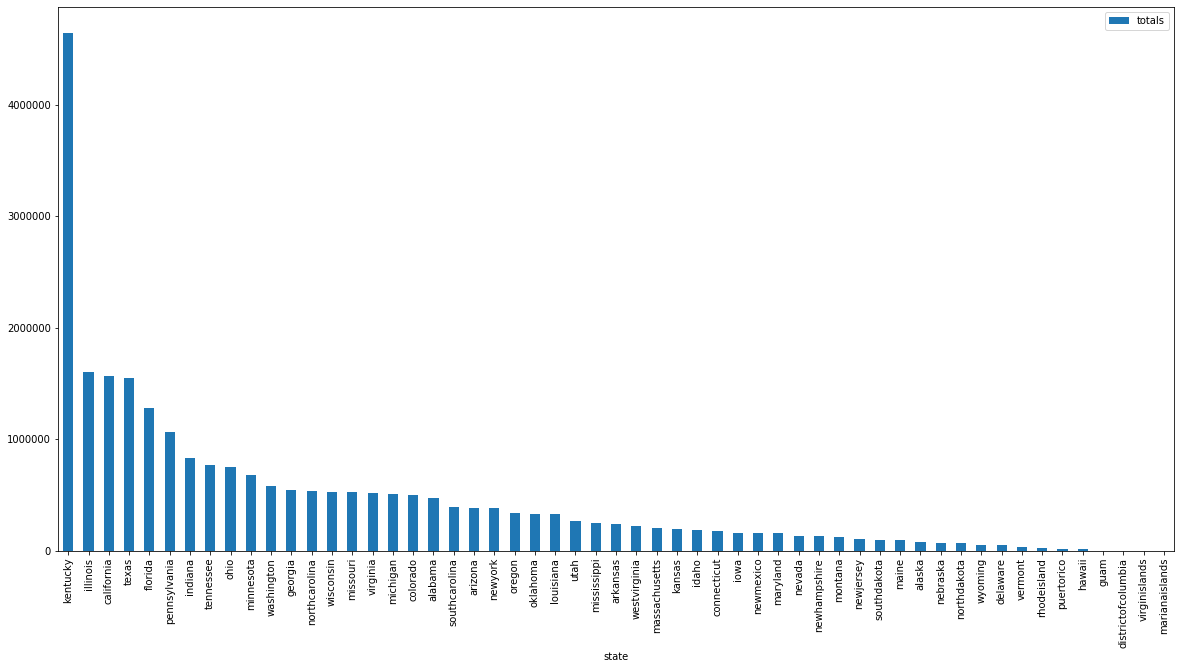

In [48]:
# Change the figure size
plt.rcParams['figure.figsize'] = [20,10]
guns2017.groupby('state').sum().reset_index().sort_values(by='totals',ascending=False).plot.bar(x='state',y='totals')

Kentucky state gives out nearly half of the total firearm permits given in the united states.  
Illinois, California, and Texas are in the similar range.

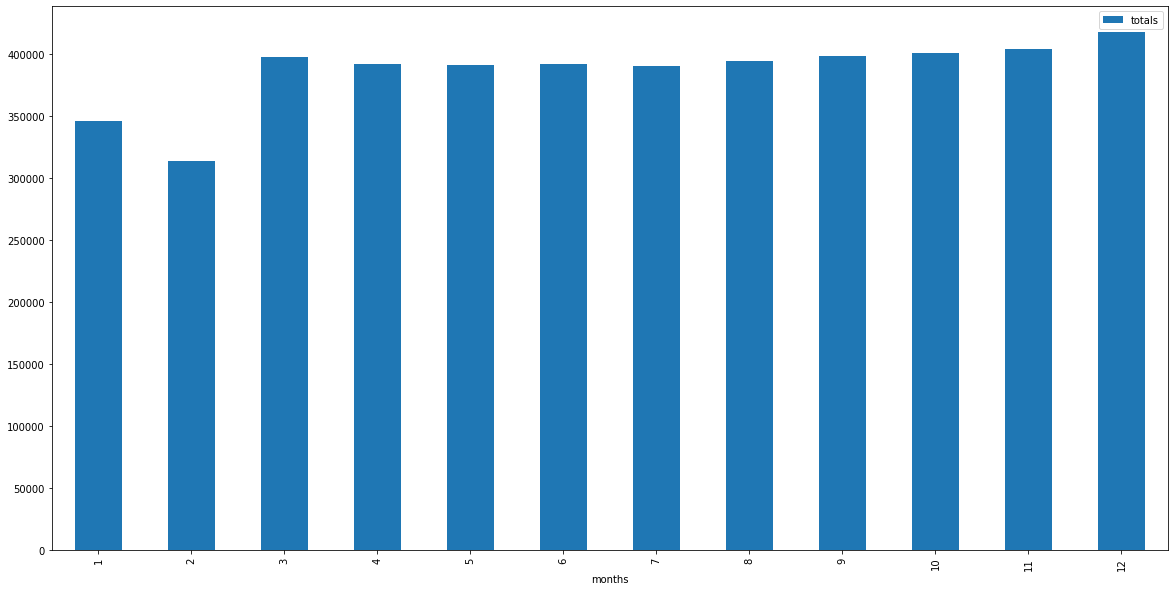

In [49]:
# Kentucky
guns2017.groupby('state').get_group("kentucky").sort_values(by='months',ascending=True).plot.bar(x='months',y='totals')

Kentucky is pretty consistent giving out firearm permits throught the year of 2017.

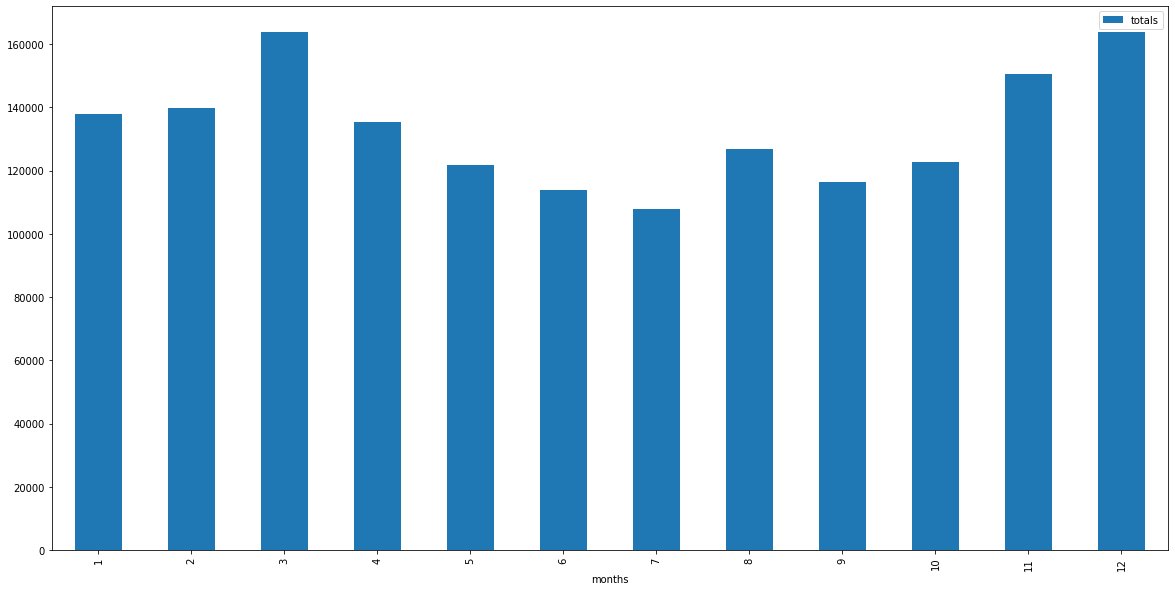

In [51]:
# Illinois
guns2017.groupby('state').get_group("illinois").sort_values(by='months',ascending=True).plot.bar(x='months',y='totals')

Illinois gave out the permits the most in March and December. However, it's not even near the half of permits given out by Kentucky states in both March and December.

In [86]:
permit2017bystate = guns2017.pivot_table(values='totals', index= 'state',aggfunc=np.sum).reset_index()

In [26]:
permit2017bystate.shape

(55, 2)

In [16]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
YEAR      250 non-null float64
STATE     250 non-null object
RATE      250 non-null float64
DEATHS    250 non-null object
URL       250 non-null object
dtypes: float64(2), object(3)
memory usage: 9.9+ KB


In [17]:
mortality.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2017.0,AL,22.9,"1,124",/nchs/pressroom/states/alabama/alabama.htm
1,2017.0,AK,24.5,180,/nchs/pressroom/states/alaska/alaska.htm
2,2017.0,AZ,15.8,"1,134",/nchs/pressroom/states/arizona/arizona.htm
3,2017.0,AR,20.3,613,/nchs/pressroom/states/arkansas/arkansas.htm
4,2017.0,CA,7.9,"3,184",/nchs/pressroom/states/california/california.htm


In [18]:
pattern = r"(?<=/nchs/pressroom/states/)\b(/w+)\b(?=/.+)"
mortality['state'] = mortality.URL.str.extract(r"(?<=/nchs/pressroom/states/)(\w.+)(?=\/.+)")

In [19]:
mortality2017 = mortality[mortality.YEAR == 2017.0]

In [20]:
mortality['YEAR'] = mortality2017['YEAR'] = 2017

C:\Users\munsu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
mortality2017.head()

,YEAR,STATE,RATE,DEATHS,URL,state
0,2017,AL,22.9,"1,124",/nchs/pressroom/states/alabama/alabama.htm,alabama
1,2017,AK,24.5,180,/nchs/pressroom/states/alaska/alaska.htm,alaska
2,2017,AZ,15.8,"1,134",/nchs/pressroom/states/arizona/arizona.htm,arizona
3,2017,AR,20.3,613,/nchs/pressroom/states/arkansas/arkansas.htm,arkansas
4,2017,CA,7.9,"3,184",/nchs/pressroom/states/california/california.htm,california


In [22]:
mortality2017copy = mortality2017.copy()[['YEAR','state','RATE','DEATHS']]

In [28]:
mortality2017copy.shape

(50, 4)

In [46]:
date = pd.to_datetime(guns.month)
guns['year'] = date.dt.year

In [45]:
permit2017bystate['state']

0                alabama
1                 alaska
2                arizona
3               arkansas
4             california
5               colorado
6            connecticut
7               delaware
8     districtofcolumbia
9                florida
10               georgia
11                  guam
12                hawaii
13                 idaho
14              illinois
15               indiana
16                  iowa
17                kansas
18              kentucky
19             louisiana
20                 maine
21        marianaislands
22              maryland
23         massachusetts
24              michigan
25             minnesota
26           mississippi
27              missouri
28               montana
29              nebraska
30                nevada
31          newhampshire
32             newjersey
33             newmexico
34               newyork
35         northcarolina
36           northdakota
37                  ohio
38              oklahoma
39                oregon


# Merge Gun Permit and Mortality Data

In [87]:
merged2017 = pd.merge(permit2017bystate,mortality2017copy,how='outer', on = 'state')

In [88]:
# Drop States that have no data
merged2017 = merged2017.dropna().sort_values(by='totals',ascending=False)
totalstop5 = merged2017.head()
totalstop5

,state,totals,YEAR,RATE,DEATHS
18,kentucky,4641480.0,2017.0,16.2,730
14,illinois,1601087.0,2017.0,12.1,"1,543"
4,california,1570110.0,2017.0,7.9,"3,184"
46,texas,1549434.0,2017.0,12.4,"3,513"
9,florida,1276549.0,2017.0,12.4,"2,724"


In [94]:
# Sort by the death rates per 100,000 people
deaths_top5 = merged2017.sort_values(by='RATE',ascending=False)
deaths_top5.head()

,state,totals,YEAR,RATE,DEATHS
1,alaska,80839.0,2017.0,24.5,180
0,alabama,477345.0,2017.0,22.9,"1,124"
28,montana,123938.0,2017.0,22.5,244
19,louisiana,329201.0,2017.0,21.7,"1,008"
26,mississippi,251852.0,2017.0,21.5,632


Text(0.5, 1.0, 'Top 5 Permits given by States')

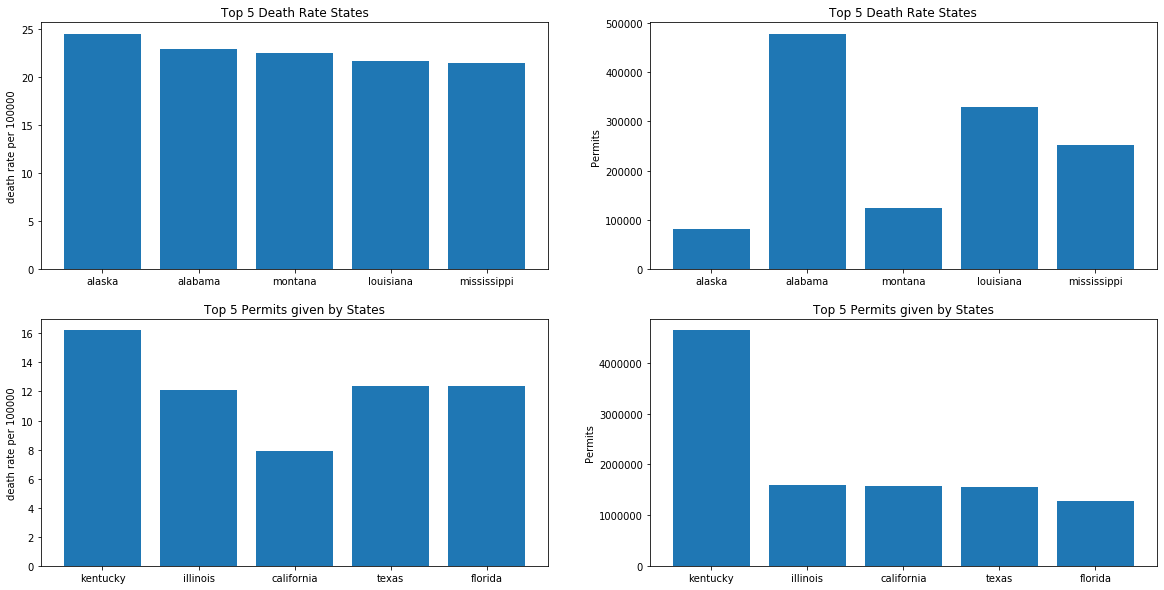

In [90]:
top5 = deaths_top5.head()
fig, ax = plt.subplots(2,2)
ax[0,0].bar(top5.state,top5.RATE)
ax[0,0].set_ylabel('death rate per 100000')
ax[0,0].set_title('Top 5 Death Rate States')

ax[0,1].bar(top5.state,top5.totals)
ax[0,1].set_ylabel('Permits')
ax[0,1].set_title('Top 5 Death Rate States')

ax[1,0].bar(totalstop5.state,totalstop5.RATE)
ax[1,0].set_ylabel('death rate per 100000')
ax[1,0].set_title('Top 5 Permits given by States')

ax[1,1].bar(totalstop5.state,totalstop5.totals)
ax[1,1].set_ylabel('Permits')
ax[1,1].set_title('Top 5 Permits given by States')

# High School Rate vs Merge Gun Permit and Mortality Data

There is no correlation for the higher number of permits is associated with the higher mortality rate in the given states. Alaska is one of the lowest states with firearm permits (N = 80839); yet, the mortality rate (24.5 deaths per 100,000) is at the highest out of united states. On the contrary, Kentucky, which has given out the most firearm permits (N= 4,641,480) has the rank of 14th in the united states. (16.2 deaths per 100,000).

In [104]:
highschool.head()

,state,graduation rate
0,Alabama,89.3
1,Alaska,78.2
2,Arizona,78.0
3,Arkansas,88.0
4,California,82.7


In [130]:
# make lowercase for state so we  can merge the data & get rid of white spaces
highschool.state = highschool.state.str.lower().str.replace(' ','')
highschool.head()

,state,graduation rate
0,alabama,89.3
1,alaska,78.2
2,arizona,78.0
3,arkansas,88.0
4,california,82.7


In [131]:
merged2017.head(1)

,state,totals,YEAR,RATE,DEATHS
18,kentucky,4641480.0,2017.0,16.2,730


In [132]:
education = pd.merge(merged2017,highschool,how='outer', on = 'state')

In [133]:
education = education.dropna()

In [140]:
education1 = education.sort_values(by='graduation rate',ascending=False).reset_index()

In [144]:
education1.drop('index',axis=1)

,state,totals,YEAR,RATE,DEATHS,graduation rate
0,iowa,160981.0,2017.0,9.0,293,91.0
1,newjersey,103739.0,2017.0,5.3,478,90.5
2,kentucky,4641480.0,2017.0,16.2,730,89.7
3,texas,1549434.0,2017.0,12.4,"3,513",89.7
4,westvirginia,222768.0,2017.0,18.6,348,89.4
5,alabama,477345.0,2017.0,22.9,"1,124",89.3
6,vermont,37610.0,2017.0,11.7,70,89.1
7,nebraska,74318.0,2017.0,8.3,160,89.1
8,newhampshire,129090.0,2017.0,10.4,146,88.9
9,wisconsin,526523.0,2017.0,10.6,624,88.6


The highest high school graduation rate is at 91% at iowa state and Iowa state is at 71.1% at New Mexico state. However, the graduation rate does not correlate with the death rate. Also, the graduation rate does not correlate with the permits.